# 인공신경망
### 두뇌의 신경세포인 뉴런을 수학적으로 모방한 모델로 뉴런에 들어온 입력값이 임계치를 넘어 활성화되면 다음 뉴런으로 출력값을 내보내는 형식이다. 즉 인공 신경망에서 뉴런이라는 함수에 입력값 a, b, c를 집어 넣었을 때, 어떠한 방식으로 계산된 출력값 1개가 나온다고 생각하면 된다.
### 학습 : 뉴런에 입력값 x가 있으면 입력 개수 만큼 가중치w와 1개의 편향값 b를 통해 실제 정답에 근사하는 출력값을 만들기 위해 가중치와 편향값을 반복적으로 조절하는 과정이다.
### 활성화 함수 : 가중치 계산 결과값 y가 최종적으로 어떤 형태의 출력값으로 내보낼지 결정하는 것이다.
#### 스텝 함수 : 입력값이 0보다 클 때는 1로, 0이하 일 때는 0으로 만든다.(즉, 입력값이 양수일 때만 활성화) 출력값이 0 또는 1이므로 입력값에 대해 판별을 해야하는 결과가 합/불 , True/False 와 같이 나타내어져야 할 때(=분류 문제) 사용된다. 그러나 입력값이 0.1의 경우 0에 가깝지만 0보타 크므로 1로 출력하므로 실제로 사용하기에 오차가 매우 크다.
#### 시그모이드 함수 : 스텝 함수의 극단적인 결과를 보완하기 위해 사용한다. 출력값은 0 부터 1까지의 확률로 표현된다. 예를 들면, 합격일 확률, 거짓일 확률 등과 같다. 그러나 입력값이 커질수록 미분값이 0으로 수렴하게 되는 단점이 있어 신경망이 깊어질 수록 학습이 원활하게 이루어지지 않아 신경망을 여러 계층(=심층 신경망)으로 구현하는 경우 잘 사용하지 않는다.
###### 심층 신경망 : 입력층, 1개 이상의 은닉층, 출력층으로 구성되어 있는 신경망
#### ReLU 함수 : 입력값이 0 이상인 경우 기울기가 1인 직선, 0보다 작으면 0을 출력한다. 시그모이드 함수보다 학습속도가 빠르며 단점을 완화하는데 효과적이라 최근 주로 사용한다.
#### softmax 함수 : 입력받은 값을 출력으로 0~1 사이의 값으로 정규화한다. 이 함수는 출력값들의 총합이 항상 1이 되는 특성을 가지고 있어 결과를 확률로 표현할 수 있고 분류하고 싶은 개수만큼 출력으로 구성시켜 가장 큰 출력값을 가지는 것을 결과값으로 도출해낸다.
#### 순전파 : 신경망 모델에서 입력층으로부터 출력층까지 데이터가 순방향으로 전파되는 과정으로 데이터가 순방향으로 전파될 때 현 단계 뉴런의 가중치와 전 단계 뉴런의 출력값을 곱의 입력값으로 받는다. 이 값을 다시 활성화 함수를 통해 다음 뉴런으로 전파시키고 반복하여 최종적으로 출력층에서 나온 결과값이 모델에서 예상한 값이 된다.
#### 오차역전파 : 실제값과 비교해 오차가 많이 발생했다면 다음 순전파 진행 시 오차가 줄어드는 방향으로 가중치를 역방향으로 갱신해나가는 과정으로 여기서 말하는 오차는 순전파 결과값과 우리가 목표하는 실제값의 차이를 말한다. 참고로 가중치를 역방향으로 갱신해나갈 때 편미분을 통해 가중치 변화 방향의 크기를 계산한다.
#### 심층 신경망의 원활한 학습을 위해 내부 은닉층의 활성화 함수에는 ReLU, 0에서 1까지 확률적인 표현을 위해 출력층엔 시그모이드 함수를 사용해 정확도를 올리는 방법을 많이 사용한다.

## MNIST 예제
### MNIST : 사람이 손글씨로 쓴 0~9까지의 숫자를 이미지화한 데이터셋

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [16]:
# MNIST 데이터셋 가져오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # 데이터 정규화

In [17]:
# tf.data를 사용하여 데이터셋을 섞고 배치 만들기
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(10000)
train_size = int(len(x_train) * 0.7) # 학습셋:검증셋 = 7:3
train_ds = ds.take(train_size).batch(20)
val_ds = ds.skip(train_size).batch(20)

In [18]:
# MNIST 분류 모델 구성
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
# 모델 생성
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [20]:
# 모델 학습
hist = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.7952 - accuracy: 0.7677 - val_loss: 0.3823 - val_accuracy: 0.8914
Epoch 2/10
2100/2100 [==============================] - 3s 1ms/step - loss: 0.3564 - accuracy: 0.8992 - val_loss: 0.3187 - val_accuracy: 0.9078
Epoch 3/10
2100/2100 [==============================] - 3s 2ms/step - loss: 0.3090 - accuracy: 0.9122 - val_loss: 0.2779 - val_accuracy: 0.9208
Epoch 4/10
2100/2100 [==============================] - 3s 2ms/step - loss: 0.2730 - accuracy: 0.9218 - val_loss: 0.2475 - val_accuracy: 0.9292
Epoch 5/10
2100/2100 [==============================] - 3s 2ms/step - loss: 0.2470 - accuracy: 0.9292 - val_loss: 0.2295 - val_accuracy: 0.9327
Epoch 6/10
2100/2100 [==============================] - 3s 2ms/step - loss: 0.2234 - accuracy: 0.9355 - val_loss: 0.2244 - val_accuracy: 0.9326
Epoch 7/10
2100/2100 [==============================] - 4s 2ms/step - loss: 0.2071 - accuracy: 0.9400 - val_loss: 0.1965 - val_accuracy:

In [21]:
# 모델 평가
print('모델 평가')
model.evaluate(x_test, y_test)

모델 평가
313/313 [==============================] - 0s 981us/step - loss: 0.1725 - accuracy: 0.9480


[0.17253544926643372, 0.9480000138282776]

In [22]:
# 모델 정보 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 모델 저장
model.save('mnist_model.h5')

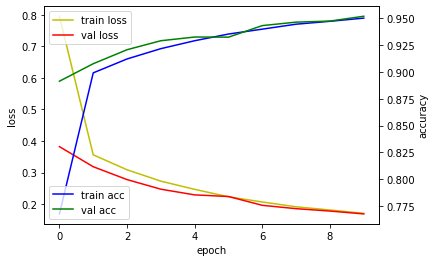

In [25]:
# 학습 결과 그래프
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
plt.show()

### 다운로드한 데이터셋은 숫자 이미지들이 배열 형태로 저장되어 있으며 픽셀값의 범위가 0~255 사이이고 신경망 입력층에는 0~1 사이의 값을 입력해야하므로 255로 나누어 주어 정규화를 한다.
### 배치사이즈는 학습 시 샘플 수를 의미하며, 배치 사이즈가 작을수록 가중치 갱신이 자주 일어난다.
### Flatten 계층은 28x28 크기의 2차원 이미지를 1차원으로 평탄화 시켜준다. 따라서 2차원 배열을 쭉 일렬로 나열해 1차원으로 만들어서 신경망의 뉴런은 총 784개가 된다.
### 손실함수로 sparse_categorical_crossentropy가 사용되었는데 이것은 다중 분류 문제에서 주로 사용된다.
### 그래프를 보면 학습횟수(epoch)가 증가할 때 정확도고 같이 올라가고 손실값은 점점 감소하는 형태를 보여준다. 앞으로의 모델 학습시에도 이와같은 그래프를 통해 하이퍼파라미터(epoch, batch)를 튜닝하여 좋은 결과를 도출해야한다.

## MNIST 예제(학습된 모델 불러오기)

In [26]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [27]:
# MNIST 데이터셋 가져오기
_, (x_test, y_test) = mnist.load_data()
x_test = x_test / 255.0 # 데이터 정규화

In [28]:
# 모델 불러오기
model = load_model('mnist_model.h5')
model.summary()
model.evaluate(x_test, y_test, verbose=2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________
313/313 - 0s - loss: 0.1725 - accuracy: 0.0984


[0.17253544926643372, 0.09839999675750732]

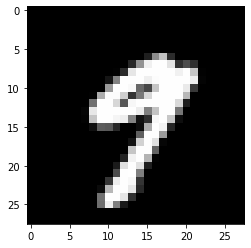

In [14]:
# 테스트셋에서 20번째 이미지 출력
plt.imshow(x_test[20], cmap="gray")
plt.show()

In [29]:
# 테스트셋의 20번째 이미지 클래스 분류
picks = [20]
predict = model.predict_classes(x_test[picks])
print("손글씨 이미지 예측값 : ", predict)

손글씨 이미지 예측값 :  [9]
